#Scientific Python Walkabout

**To use the most up-to-date version of this notebook, go to a safe and quite directory and type in the command line interface**

`git clone https://github.com/terencezl/scientific-python-walkabout`

**and**

`ipython notebook`

**and click your way into it.**

------------

##Overview

We are going to get to know the scientific python stack (only a little bit):

- NumPy (data analysis foundation, your pythonic "**MATLAB**")
- SciPy (more functionalities, e.g. integration, optimization, Fourier transforms, signal processing, linear algebra)
- matplotlib (2D plotting tool, some 3D capabilities)
- pandas (statistics, pretty viewing and flexible in/output, your pythonic "**R**")
- (Optional) SymPy (symbolic computation, your pythonic "**Mathematica**")

##Installation

If you are using **MacOS**, your system has already come with a distrubution of Python (**but** it is usually older than the up-to-date version, and is difficult to update). There are also some other ways, such as downloading the [official Python installation package](https://www.python.org/downloads/), along with **Windows** Users (**but** it is also difficult to update when it gets old), or using [Homebrew](http://brew.sh/), a convenient package manager in **MacOS**. **Linux** users can just rely on the system pakage manager.

But all of the above still require the additional installation of **Python packages** (NumPy, SciPy, matplotlib, pandas, etc.) that come on top of Python itself, the very packages that make Python a powerful and versatile language. There have been more integrated solutions, among which [Anaconda scientific Python distribution](http://continuum.io/downloads) is what the scientific community is having a great time with. If you install Anaconda, it directly comes with the full scientific stack ready, and provides a very consistent way of updating the Python packages and even Python itself.

Go to the webpage and select what suits your OS. Let's select "**I want Python 3**" as well.

##IPython Configuration Custom Setup

Go to the command line interface and call 

`ipython locate`

It will return a directory. Enter that directory and find `profile_default/ipythonrc.py`. If there is not, create one, and copy the content below into it. You can of course modify it to your need, and please remember the existence of this config file, in case you want to change it afterwards.

```python
import os
import sys

# import NumPy
try:
    import numpy as np
    print("NumPy is imported.")
except ImportError:
    print("NumPy is not imported!")

# import matplotlib
try:
    import matplotlib as mpl
    print("matplotlib is imported.")
    import matplotlib.pyplot as plt
    # turn on interactive mode
    plt.ion()
    print("Using matplotlib interactive mode.")
    # try using custom style for prettier looks
    try:
        plt.style.use('ggplot')
        print("Using custom ggplot style from matplotlib 1.4.")
    except ValueError:
        print("If matplotlib >= 1.4 is installed, styles will be used for better looks.")
except ImportError:
    print("matplotlib is not imported!")

# import pandas
try:
    import pandas as pd
    print("pandas is imported.")
except ImportError:
    print("pandas is not imported!")
```

##Basic Python

- [Tutorial in the official docs](https://docs.python.org/3/tutorial/index.html)

Some rehash

In [8]:
# copying a referecne vs copying as a new list

# copying a refernce
a = [3,4,5]
b = a
print(b is a)
b[2] = 555
print(a, b)

True
[3, 4, 555] [3, 4, 555]


In [9]:
# slice copying as a new list
a = [3,4,5]
b = a[:] # meaning slicing all
print(b is a)
b[2] = 666
print(a, b)

False
[3, 4, 5] [3, 4, 666]


In [56]:
# removing something from a list

# wrong
a = [1,2,3,3,3,3,4]
for i in a:
    if i == 3:
        a.remove(i)
print(a)

[1, 2, 3, 3, 4]


In [57]:
# right, because a[:] creates a copy
a = [1,2,3,3,3,3,4]
for i in a[:]:
    if i == 3:
        a.remove(i)
print(a)

[1, 2, 4]


In [58]:
# iterate a list as index and value
a = [10,20,30,40]
for idx, value in enumerate(a):
    print(idx, value)

0 10
1 20
2 30
3 40


In [59]:
# iterate a dict as key and value
b = {'x': 1, 'y': 2, 'z': 3}
for key, value in b.items():
    print(key, value)

x 1
z 3
y 2


In [1]:
# use zip to iterate two lists
a = [1,2,3]
b = [4,5,6]

for i, j in zip(a, b):
    print(i, j)

1 4
2 5
3 6


##NumPy & SciPy

Very good tutorials and docs:

- [Tentative NumPy Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)
- [Scientific Python stack official docs](http://www.scipy.org/docs.html)

There are a few compilations for helping MATLAB, IDL, R users transitioning to Python/NumPy. HTML and phf versions are both available. (Big thanks to Alex Mulia for bringing this to our attention!)

- [Thesaurus of Mathematical Languages, or MATLAB synonymous commands in Python/NumPy](http://mathesaurus.sourceforge.net/)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit

np.polyfit?

###NumPy Arrays

In [3]:
a0 = np.arange(6)
a = a0.reshape((2,3))
print(a.dtype, a.itemsize, a.size, a.shape, '\n')

print(a, '\n')
print(repr(a), '\n')
print(a.tolist())

int64 8 6 (2, 3) 

[[0 1 2]
 [3 4 5]] 

array([[0, 1, 2],
       [3, 4, 5]]) 

[[0, 1, 2], [3, 4, 5]]


In [6]:
b = a.astype(float)
print(b, '\n')
print(repr(b))

[[ 0.  1.  2.]
 [ 3.  4.  5.]] 

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.]])


In [81]:
# re-define a0 and a
a0 = np.arange(6)
a = a0.reshape((2,3))

# get a slice of a to make c
c = a[:2, 1:3]

# a and c are both based on a0, the very initial storage space
print(c, '\n')
print(a.base, a.base is c.base)

# changing c will change a and a0

c[0, 0] = 1111
print('\n', c, '\n')
print(a)

[[1 2]
 [4 5]] 

[0 1 2 3 4 5] True

 [[1111    2]
 [   4    5]] 

[[   0 1111    2]
 [   3    4    5]]


In [87]:
# WAT??? This is different from the slice copy of a list, e.g. mylist[:]
# if you want to make a real copy, and re-allocate some RAM, use
d = a[:]
e = a.copy()
print(d is a, e is a)

False False


In [88]:
# Well... You may expect d is the same as a, but it is just not.
# Our reasoning still holds though. You change d, you'll change a.

Now, we'll primarily demonstrate SciPy's capability of fitting.

###Fitting a single variable simple function

$f(x) = a e^{b x}$

In [3]:
def f(x, a, b):
    return a * np.exp(b * x)
    
x = np.linspace(0, 1, 1000)
y_ideal = f(x, 1, 2)
y = f(x, 1, 2) + np.random.randn(1000)

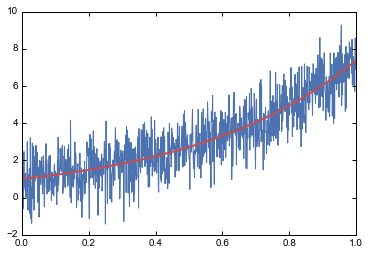

In [63]:
plt.plot(x, y)
plt.plot(x, y_ideal, lw=2)

In [4]:
popt, pcov = curve_fit(f, x, y)
# popt is the optimized parameters, and pcov is the covariance matrix.
# diagnal members np.diag(pcov) is the variances of each parameter.
# np.sqrt(np.diag(pcov)) is the standard deviation.

print(popt, '\n\n', pcov)

[ 1.07897253  1.90387424] 

 [[ 0.00116423 -0.00131469]
 [-0.00131469  0.00160216]]


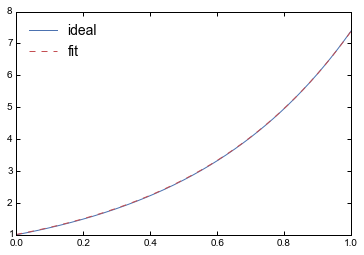

In [70]:
y_fit = f(x, popt[0], popt[1])
plt.plot(x, y_ideal, label='ideal')
plt.plot(x, y_fit, '--', label='fit')
plt.legend(loc=0, fontsize=14)

###Fitting a single variable function containing an integral

$f(x) = c  \int_o^x (a x' + b) dx' + d$

In [145]:
from scipy.integrate import quad
    
def f(x, a, b, c, d):
    # the integrand function should be within function f, because parameters a and b 
    # are available within.
    def integrand(xx):
        return a * xx + b
    # if the upper/lower limit of the integral is our unknown variable x, x has to be 
    # iterated from an array to a single value, because the quad function only accepts
    # a single value each time.
    y = np.zeros(len(x))
    for idx, value in enumerate(x):
        y[idx] = c * quad(integrand, 0, value)[0] + d
    return y

x = np.linspace(0, 1, 1000)
y_ideal = f(x, 1, 2, 3, 4)
y = f(x, 1, 2, 3, 4) + np.random.randn(1000)

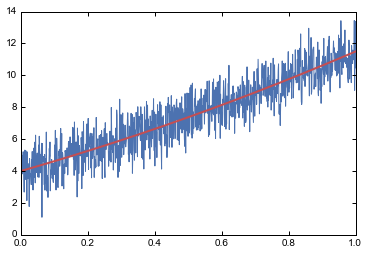

In [72]:
plt.plot(x, y)
plt.plot(x, y_ideal, lw=2)

In [73]:
popt, pcov = curve_fit(f, x, y)
print(popt, '\n\n', pcov)

[ 0.89426322  2.89630415  2.2150106   3.93961519] 

 [[  7.28798844e+10   2.36039045e+11  -1.80217436e+11  -1.03207318e+03]
 [  2.36039045e+11   7.64469256e+11  -5.83677538e+11  -3.34271797e+03]
 [ -1.80217436e+11  -5.83677538e+11   4.45641817e+11   2.55217615e+03]
 [ -1.03207330e+03  -3.34271836e+03   2.55217646e+03   8.72152764e-03]]


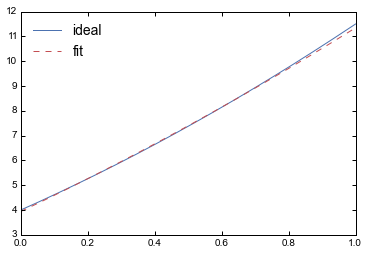

In [74]:
y_fit = f(x, popt[0], popt[1], popt[2], popt[3])
plt.plot(x, y_ideal, label='ideal')
plt.plot(x, y_fit, '--', label='fit')
plt.legend(loc=0, fontsize=14)

###Fitting a 2 variable function

$f(x) = a e^{b x_1} + e^{c x_2}$

In [76]:
def f(x, a, b, c):
    return a * np.exp(b * x[0]) + np.exp(c * x[1])

x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(0, 1, 1000)
x = [x1, x2]
y_ideal = f(x, 1, 2, 3)
y = f(x, 1, 2, 3) + np.random.randn(1000)

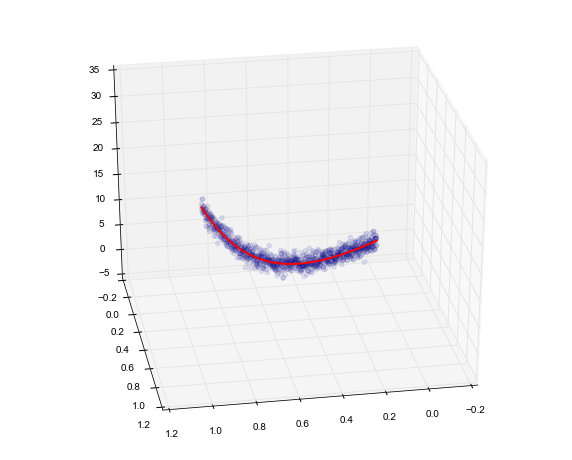

In [136]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y, alpha=.1)
ax.plot(x[0], x[1], y_ideal, 'r', lw=2)
ax.view_init(30, 80)

In [119]:
popt, pcov = curve_fit(f, x, y)
print(popt, '\n\n', pcov)

[ 1.04136311  1.94804635  3.00403201] 

 [[ 0.0033722  -0.01082638  0.00288416]
 [-0.01082638  0.04221621 -0.01233034]
 [ 0.00288416 -0.01233034  0.00375183]]


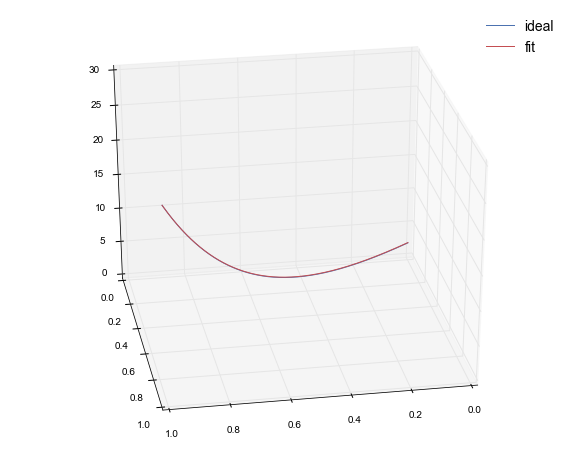

In [140]:
fig = plt.figure(figsize=(10,8))
y_fit = f(x, popt[0], popt[1], popt[2])
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[0], x[1], y_ideal, label='ideal')
ax.plot(x[0], x[1], y_fit, label='fit')
plt.legend(loc=0, fontsize=14)
ax.view_init(30, 80)

##matplotlib

Some core concepts in http://matplotlib.org/faq/usage_faq.html regarding backends, (non-)interactive modes.

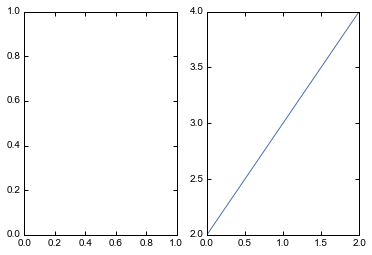

In [3]:
# pyplot (plt) interface vs object oriented interface
fig, axes = plt.subplots(1, 2)
plt.plot([2,3,4])

# Looks like it automatically chose the right axes to plot on.

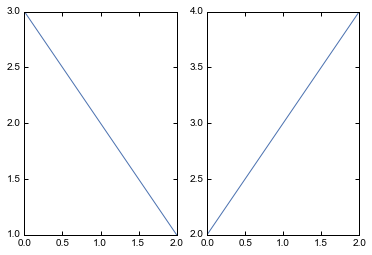

In [11]:
# how can I plot on the first graph? 
# Either keep (well... kind of) using the convenient pyplot interface

fig, axes = plt.subplots(1, 2)
plt.plot([2,3,4])
# change the state of the focus by switching to the zeroth axes
plt.sca(axes[0])
plt.plot([3,2,1])

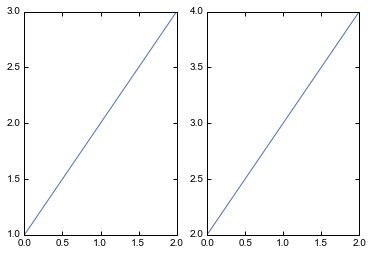

In [10]:
# Or use the object oriented interface

fig, axes = plt.subplots(1, 2)
plt.plot([2,3,4])
print(axes)
ax = axes[0]
ax.plot([1,2,3])
# if you are not using notebook, and have switched on interactive mode by plt.ion(),
# you need to explicitly say
plt.draw()

# But it doesn't hurt if you say it anyway.
# So there I said it.

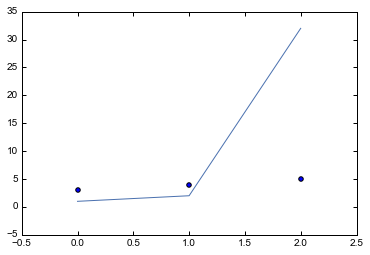

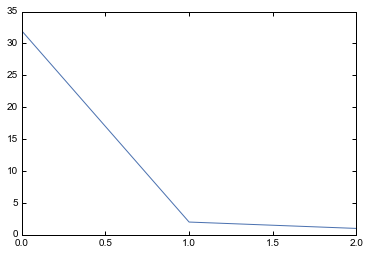

In [30]:
# Similarly, if you have two figures and want to switch back and forth

# create figs
fig1 = plt.figure('Ha')
plt.plot([1,2,32])
fig2 = plt.figure(2)
plt.plot([32,2,1])

# switch back to fig 'Ha'
plt.figure('Ha')
plt.scatter([0,1,2], [3,4,5])

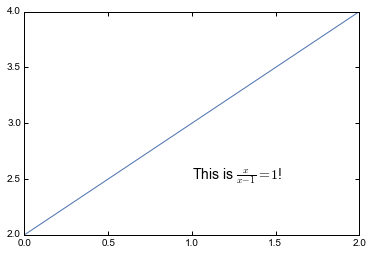

In [10]:
# add text and then delete
plt.plot([2,3,4])
plt.text(1, 2.5, r'This is $\frac{x}{x - 1} = 1$!', fontsize=14)

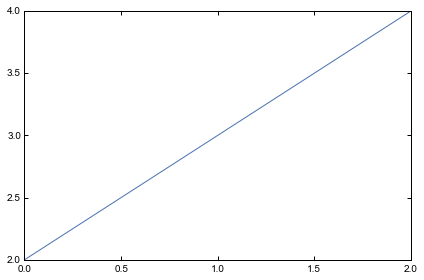

In [189]:
# to delete the text, first get the axes reference, and pop the just added text object out of the list
plt.plot([2,3,4])
plt.text(1, 2.5, r'This is $\frac{x}{x - 1} = 1$!', fontsize=14)
ax = plt.gca()
# print(ax.texts) will give you a list, with one element
ax.texts.pop()
# you have to redraw the figure
plt.draw()

# same can be applied to lines by `ax.lines.pop()`

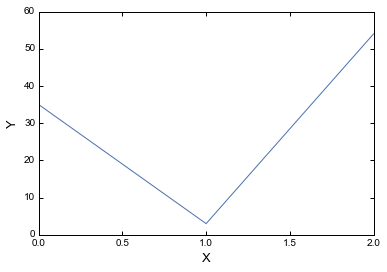

In [192]:
# tight_layout() to automatically adjust the elements in a figure

plt.plot([35,3,54])
plt.xlabel('X')
plt.ylabel('Y')

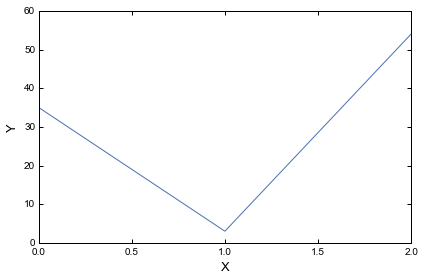

In [193]:
plt.plot([35,3,54])
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()

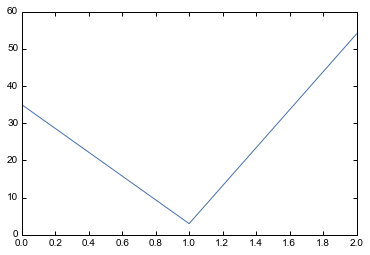

In [195]:
# locator_params() to have more or less ticks
plt.plot([35,3,54])
plt.locator_params(nbins=10)

##pandas

A very good glimpse: [Ten minutes of pandas](http://pandas.pydata.org/pandas-docs/dev/10min.html).

Read data from online files.

In [153]:
pd.read_csv('https://raw.githubusercontent.com/pydata/pandas/master/doc/data/baseball.csv', index_col='id')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2,1,1,4,4,0,0,3,0,0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0,0,0,0,1,0,0,0,0,0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0,0,0,0,2,0,0,0,0,0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0,0,0,0,4,0,0,0,0,0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40,7,0,46,55,2,2,3,4,6
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73,0,1,69,58,10,7,0,6,14
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0,0,0,1,7,0,0,6,0,1
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8,0,0,4,10,1,0,0,1,1


In [152]:
df = pd.read_excel('https://github.com/pydata/pandas/raw/master/doc/data/test.xls')
print(df)

                   A         B         C         D
2000-01-03  0.980269  3.685731 -0.364217 -1.159738
2000-01-04  1.047916 -0.041232 -0.161812  0.212549
2000-01-05  0.498581  0.731168 -0.537677  1.346270
2000-01-06  1.120202  1.567621  0.003641  0.675253
2000-01-07 -0.487094  0.571455 -1.611639  0.103469
2000-01-10  0.836649  0.246462  0.588543  1.062782
2000-01-11 -0.157161  1.340307  1.195778 -1.097007


###Ways of Indexing

Very confusing? See http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

In [163]:
# simple column selection by label
df['A']

2000-01-03    0.980269
2000-01-04    1.047916
2000-01-05    0.498581
2000-01-06    1.120202
2000-01-07   -0.487094
2000-01-10    0.836649
2000-01-11   -0.157161
Name: A, dtype: float64

In [161]:
# simple row slice by position, end not included
df[0:2]

,A,B,C,D
2000-01-03,0.980269,3.685731,-0.364217,-1.159738
2000-01-04,1.047916,-0.041232,-0.161812,0.212549


In [149]:
# explicit row selection
df.loc['2000-01-03']

A    0.980269
B    3.685731
C   -0.364217
D   -1.159738
Name: 2000-01-03 00:00:00, dtype: float64

In [165]:
# explicit row slicing, end included
df.loc['2000-01-03':'2000-01-05']

,A,B,C,D
2000-01-03,0.980269,3.685731,-0.364217,-1.159738
2000-01-04,1.047916,-0.041232,-0.161812,0.212549
2000-01-05,0.498581,0.731168,-0.537677,1.346270


In [167]:
# explicit column selection by label
df.loc[:, 'A']

2000-01-03    0.980269
2000-01-04    1.047916
2000-01-05    0.498581
2000-01-06    1.120202
2000-01-07   -0.487094
2000-01-10    0.836649
2000-01-11   -0.157161
Name: A, dtype: float64

In [172]:
# explicit element selection by label
df.loc['Jan 3, 2000', 'A']

0.98026851377699997

In [168]:
# explicit row selection by position
df.iloc[0]

A    0.980269
B    3.685731
C   -0.364217
D   -1.159738
Name: 2000-01-03 00:00:00, dtype: float64

In [170]:
# explicit row slicing by position, end not included
df.iloc[0:2]

,A,B,C,D
2000-01-03,0.980269,3.685731,-0.364217,-1.159738
2000-01-04,1.047916,-0.041232,-0.161812,0.212549


In [169]:
# explicit column selection by position
df.iloc[:, 0]

2000-01-03    0.980269
2000-01-04    1.047916
2000-01-05    0.498581
2000-01-06    1.120202
2000-01-07   -0.487094
2000-01-10    0.836649
2000-01-11   -0.157161
Name: A, dtype: float64

In [171]:
# explicit element selection by position
df.iloc[0, 0]

0.98026851377699997

In [173]:
# mixed selection, row by position and column by label
df.ix[0, 'A']

0.98026851377699997

##Reference and Resources

- [jrjohansson: Lectures on scientific computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/)
- [jakevdp: Astronomy 599: Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2013_fall_ASTR599/tree/master/notebooks/)
- [Python Scientific Lecture Notes](http://scipy-lectures.github.io)